<a href="https://colab.research.google.com/github/Svensone/fast.ai-coursev3/blob/master/%5Bfastai%5D_CV_Bali_Java.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Balinese or Javanes

simple CNN to detect Balinese or Javanese People

In [1]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
from fastai import *
from fastai.vision import *

In [7]:
dance = ['barong', 'kecak', 'legong']
path = Path('drive/My Drive/Colab Notebooks/fast.ai/BaliDance')


In [6]:
# create folder for each dance and download images from .csv
#for dance in dance:
  #dest = path/dance
  #dest.mkdir(parents = True, exist_ok = True)
  #download_images(dest.with_suffix('.csv'), dest, max_pics = 200, max_workers=0)

FileNotFoundError: ignored

In [8]:
for d in dance:
  print(d)
  verify_images(path/d, delete=True, max_size = 500)

barong


cannot identify image file <_io.BufferedReader name='drive/My Drive/Colab Notebooks/fast.ai/BaliDance/barong/00000006.jpg'>
kecak


legong


In [9]:
# create DataBunch

## Data Augmentation with get_transforms(do_flip etc ) possible

np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, ds_tfms= get_transforms(), size= 224, num_workers=4).normalize(imagenet_stats)

In [10]:
data.classes

['barong', 'kecak', 'legong']

In [11]:
data.c

3

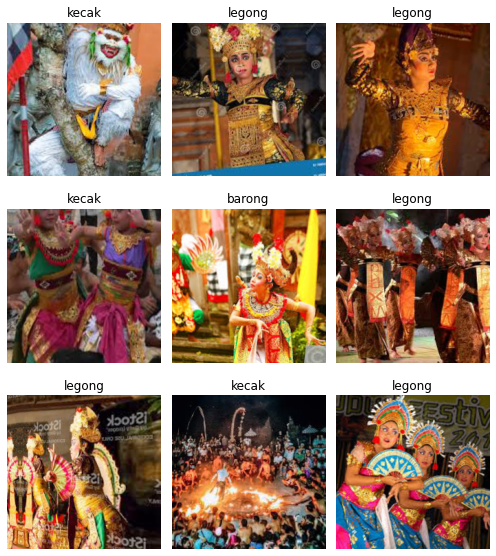

In [12]:
data.show_batch(3, figsize=(7,8))

In [13]:
len(data.train_ds)

480

## Train Model

1. test with ResNet34


In [14]:
learn = cnn_learner(data, models.resnet34, metrics = [accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [15]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,1.537528,1.660942,0.680672,00:07
1,1.156487,0.874705,0.806723,00:06


In [16]:
learn.save('stage-1')

In [26]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (480 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
barong,barong,barong,barong,barong
Path: drive/My Drive/Colab Notebooks/fast.ai/BaliDance;

Valid: LabelList (119 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
barong,legong,legong,barong,barong
Path: drive/My Drive/Colab Notebooks/fast.ai/BaliDance;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=Fa

In [28]:
learn.unfreeze()

In [29]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.681252,0.773101,0.747899,00:07
1,0.595942,0.531644,0.823529,00:07


In [30]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


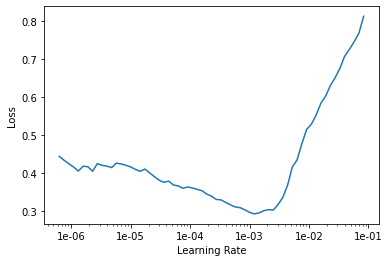

In [31]:
learn.recorder.plot()

In [32]:
learn.fit_one_cycle(4, max_lr=slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.355547,0.414148,0.873950,00:07
1,0.332960,0.623913,0.873950,00:07
2,0.279699,0.710476,0.865546,00:07
3,0.240729,0.683267,0.873950,00:07


In [33]:
learn.save('stage-2')

## Interpretation

In [34]:
interp = ClassificationInterpretation.from_learner(learn)

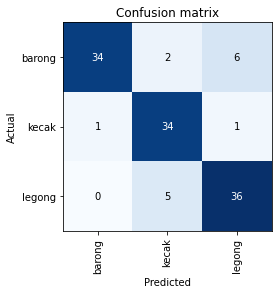

In [35]:
interp.plot_confusion_matrix()

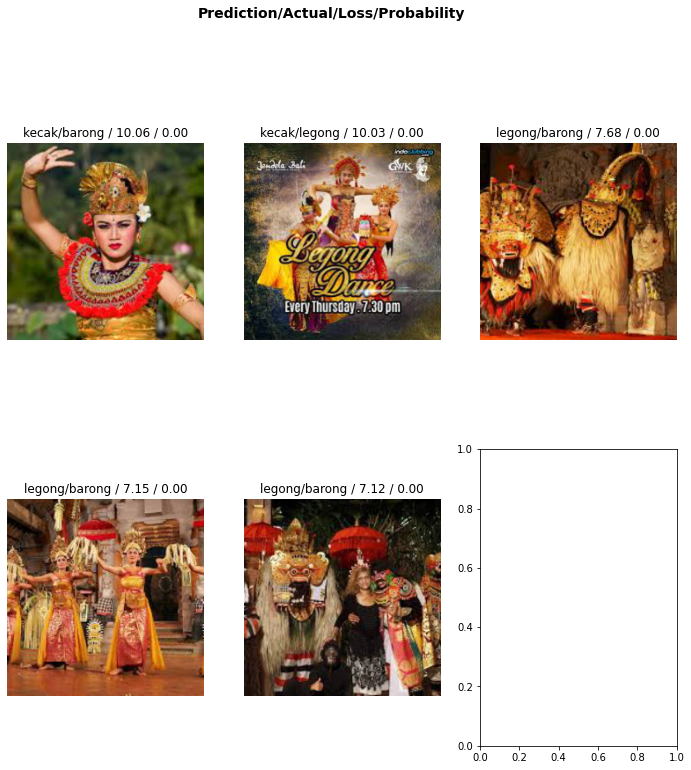

In [36]:
interp.plot_top_losses(5)

## Cleaning Up 

with Widget not possible in Colab.

## Production

